# World Autism Prevalence 

In [1]:
%load_ext autoreload
%autoreload 2

## Useful links
- [GeoPandas docs](https://geopandas.org/en/stable/docs/user_guide/mapping.html)
- [GeoPandas tutorial](https://www.google.com/search?q=how+to+plot+a+world+map+in+python&rlz=1C5CHFA_enGB892GB892&oq=how+to+plot+a+world+&aqs=chrome.0.0i512l2j69i57j0i22i30l7.5915j0j7&sourceid=chrome&ie=UTF-8#kpvalbx=_YEXFYpbODLeGhbIP98Ws-Ag16)
- [Medium article](https://melaniesoek0120.medium.com/data-visualization-how-to-plot-a-map-with-geopandas-in-python-73b10dcd4b4b)

## Imports 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

## Basic World Map 

In [3]:
# Load world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<AxesSubplot:>

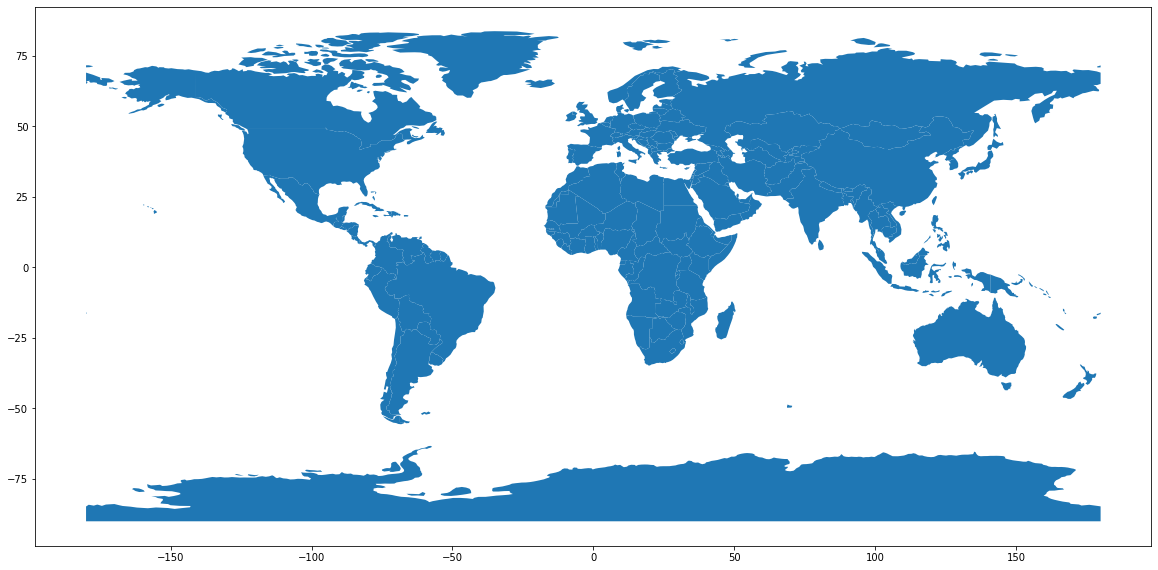

In [4]:
# Plot the map
world.plot(figsize=(20,15))

## EDA and Data Cleaning 

In [5]:
filepath = '/Users/alexwilkinson/code/ADWilk19/autism_employment/raw_data/world_autism_prevalence/autism_world_prevalence.csv'
df = pd.read_csv(filepath)
df.head()

,name,iso_a3,est_autism_prevalence_per_10k
0,Fiji,FJI,81.10
1,Tanzania,TZA,83.10
2,W. Sahara,ESH,83.83
3,Canada,CAN,86.40
4,United States of America,USA,80.90


In [6]:
# Merge world and aut DataFrames
merged=pd.merge(world,df,on='iso_a3')
# Take a look at the DataFrame
# merged.head()
# print(merged.describe())
print(merged.columns)

Index(['pop_est', 'continent', 'name_x', 'iso_a3', 'gdp_md_est', 'geometry',
       'name_y', 'est_autism_prevalence_per_10k'],
      dtype='object')


In [7]:
# Remove duplicate column
merged.drop('name_y', axis=1, inplace=True)

In [8]:
# Rename name_x column
merged.rename(columns = {'name_x':'name'}, inplace = True)

In [9]:
# Remove Antartica
merged.drop(158, inplace = True)

In [10]:
# Check DataFrame changes
merged.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,est_autism_prevalence_per_10k
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",81.10
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",83.10
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",83.83
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",86.40
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",80.90


In [11]:
# Create prevalence_rank column
merged['prevalence_rank'] = merged.est_autism_prevalence_per_10k.rank(method='first',ascending=False)

In [12]:
# Set prevalence_rank as index
merged = merged.set_index('prevalence_rank')

In [13]:
# Sort by index
merged = merged.sort_index()

In [14]:
len(merged)

175

In [16]:
merged.iloc[0:5]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,est_autism_prevalence_per_10k
prevalence_rank,,,,,,,
1.0,2832067.0,Asia,Qatar,QAT,175837,"POLYGON ((50.81011 24.75474, 50.74391 25.48242...",151.2
2.0,9770529.0,Asia,United Arab Emirates,ARE,421142,"POLYGON ((51.57952 24.24550, 51.75744 24.29407...",112.4
3.0,4974986.0,Asia,Oman,OMN,76331,"MULTIPOLYGON (((55.20834 22.70833, 55.23449 23...",107.2
4.0,34268528.0,Asia,Saudi Arabia,SAU,792966,"POLYGON ((34.95604 29.35655, 36.06894 29.19749...",100.7
5.0,4207083.0,Asia,Kuwait,KWT,134628,"POLYGON ((47.97452 29.97582, 48.18319 29.53448...",97.7


In [31]:
merged.iloc[170:]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,est_autism_prevalence_per_10k
prevalence_rank,,,,,,,
171.0,5347896.0,Europe,Norway,NOR,403336,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80...",72.0
172.0,60297396.0,Europe,Italy,ITA,2003576,"MULTIPOLYGON (((10.44270 46.89355, 11.04856 46...",72.0
173.0,361313.0,Europe,Iceland,ISL,24188,"POLYGON ((-14.50870 66.45589, -14.73964 65.808...",71.9
174.0,10269417.0,Europe,Portugal,PRT,238785,"POLYGON ((-9.03482 41.88057, -8.67195 42.13469...",70.5
175.0,67059887.0,Europe,France,FRA,2715518,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...",69.3


## Create Static Autism Prevalence map 

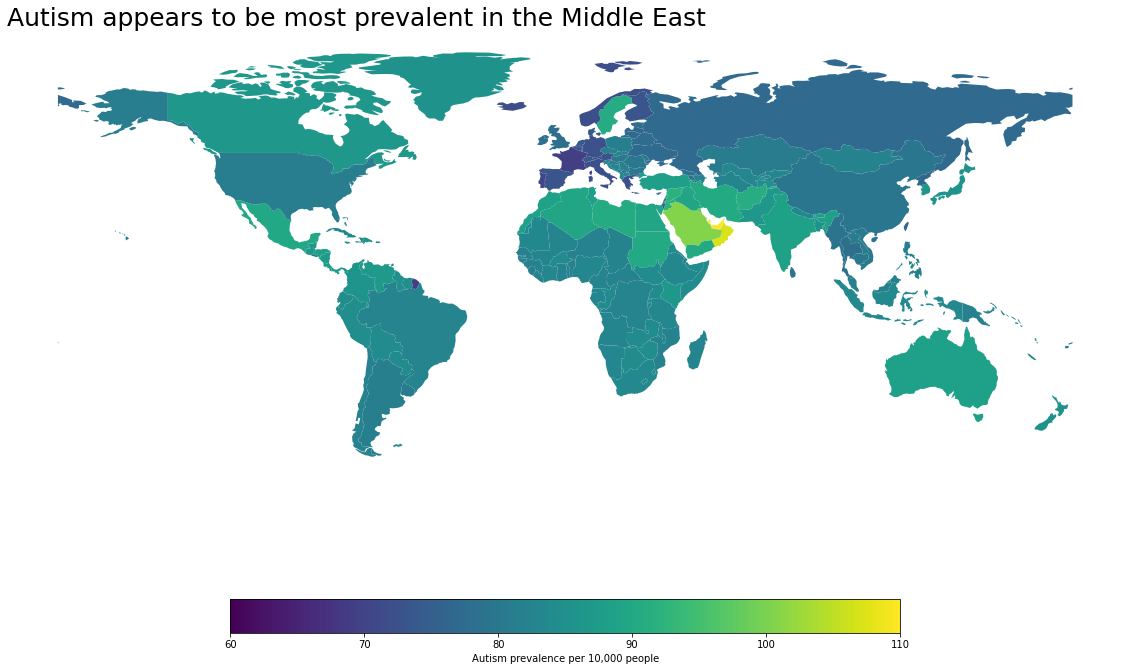

In [17]:
# Create map using matplotlib and the merged DataFrame
# ax = plt.subplot(1,1,1)
# ax.
merged.plot(column='est_autism_prevalence_per_10k',
            figsize=(20,15),
            legend=True,
            legend_kwds={'label': "Autism prevalence per 10,000 people",
                        'orientation': "horizontal",
                         'shrink': 0.6},
            vmin=60.0, 
            vmax=110)
plt.axis('off')
plt.title('Autism appears to be most prevalent in the Middle East',fontsize=25, loc='left')
plt.show()

## Create Interactive Map 

In [18]:
merged.explore(
     column="est_autism_prevalence_per_10k", 
     k=10, # number of bins
     vmin = 65,
     vmax = 115)

### Plots for countries with highest and lowest prevalence

In [19]:
merged.sort_values('est_autism_prevalence_per_10k')

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,est_autism_prevalence_per_10k
prevalence_rank,,,,,,,
175.0,67059887.0,Europe,France,FRA,2715518,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...",69.3
174.0,10269417.0,Europe,Portugal,PRT,238785,"POLYGON ((-9.03482 41.88057, -8.67195 42.13469...",70.5
173.0,361313.0,Europe,Iceland,ISL,24188,"POLYGON ((-14.50870 66.45589, -14.73964 65.808...",71.9
172.0,60297396.0,Europe,Italy,ITA,2003576,"MULTIPOLYGON (((10.44270 46.89355, 11.04856 46...",72.0
171.0,5347896.0,Europe,Norway,NOR,403336,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80...",72.0
...,...,...,...,...,...,...,...
5.0,4207083.0,Asia,Kuwait,KWT,134628,"POLYGON ((47.97452 29.97582, 48.18319 29.53448...",97.7
4.0,34268528.0,Asia,Saudi Arabia,SAU,792966,"POLYGON ((34.95604 29.35655, 36.06894 29.19749...",100.7
3.0,4974986.0,Asia,Oman,OMN,76331,"MULTIPOLYGON (((55.20834 22.70833, 55.23449 23...",107.2


In [20]:
top_5 = merged.nlargest(n=5,columns=['est_autism_prevalence_per_10k'])

In [21]:
top_5.sort_values('est_autism_prevalence_per_10k',ascending=False,inplace=True)
top_5

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,est_autism_prevalence_per_10k
prevalence_rank,,,,,,,
1.0,2832067.0,Asia,Qatar,QAT,175837,"POLYGON ((50.81011 24.75474, 50.74391 25.48242...",151.2
2.0,9770529.0,Asia,United Arab Emirates,ARE,421142,"POLYGON ((51.57952 24.24550, 51.75744 24.29407...",112.4
3.0,4974986.0,Asia,Oman,OMN,76331,"MULTIPOLYGON (((55.20834 22.70833, 55.23449 23...",107.2
4.0,34268528.0,Asia,Saudi Arabia,SAU,792966,"POLYGON ((34.95604 29.35655, 36.06894 29.19749...",100.7
5.0,4207083.0,Asia,Kuwait,KWT,134628,"POLYGON ((47.97452 29.97582, 48.18319 29.53448...",97.7


In [22]:
bottom_5 = merged.nsmallest(n=5,columns=['est_autism_prevalence_per_10k'])
bottom_5

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,est_autism_prevalence_per_10k
prevalence_rank,,,,,,,
175.0,67059887.0,Europe,France,FRA,2715518,"MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...",69.3
174.0,10269417.0,Europe,Portugal,PRT,238785,"POLYGON ((-9.03482 41.88057, -8.67195 42.13469...",70.5
173.0,361313.0,Europe,Iceland,ISL,24188,"POLYGON ((-14.50870 66.45589, -14.73964 65.808...",71.9
171.0,5347896.0,Europe,Norway,NOR,403336,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80...",72.0
172.0,60297396.0,Europe,Italy,ITA,2003576,"MULTIPOLYGON (((10.44270 46.89355, 11.04856 46...",72.0


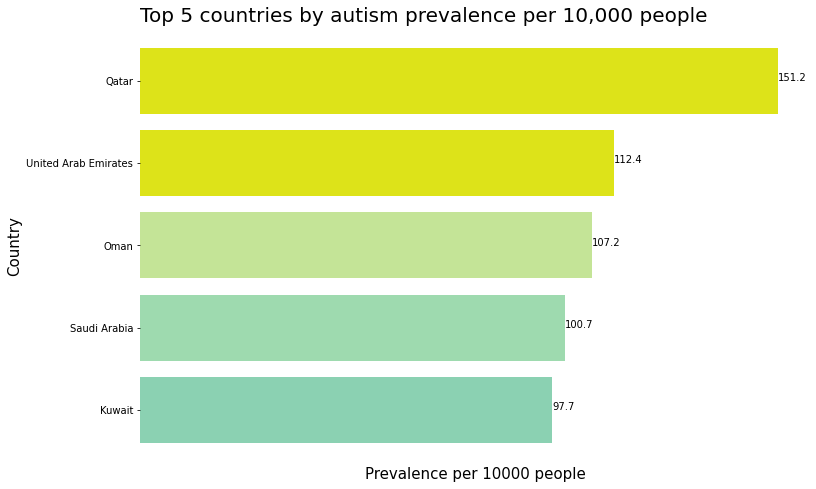

In [23]:
# Set figsize
fig, ax = plt.subplots(figsize=(12,8))
# Declare x and y before plotting
x = merged['name'].iloc[0:5]
y = merged['est_autism_prevalence_per_10k'].iloc[0:5]
plt.barh(x, y,color=['#dde319','#dde319','#c4e497','#9edaaf','#8bd1b2']) # Specify the color of the bars

# Adding labels to the bars
for index, value in enumerate(y):
    plt.text(value, index,
             str(value))

# Formatting
plt.title('Top 5 countries by autism prevalence per 10,000 people',size = 20, loc='left')
ax.set_xticks([])
ax.set_xticklabels([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.invert_yaxis()
plt.xlabel('Prevalence per 10000 people', size = 15)
plt.ylabel('Country', size = 15)
plt.show()

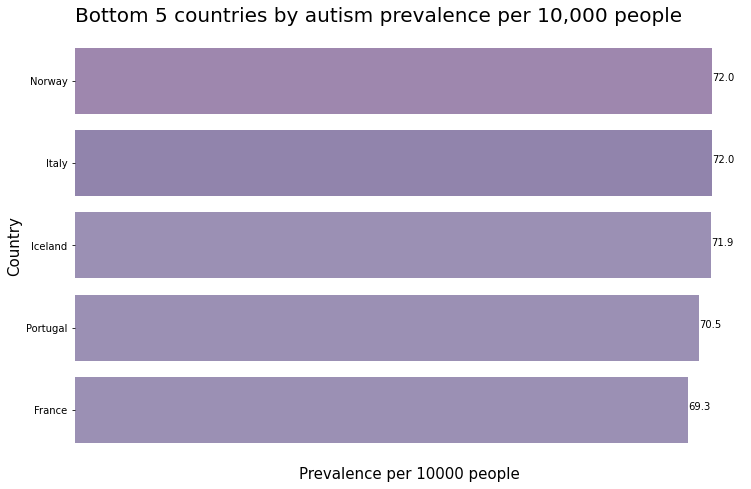

In [39]:
fig, ax = plt.subplots(figsize=(12,8))
# Declare x and y before plotting
x = merged['name'].iloc[170:]
y = merged['est_autism_prevalence_per_10k'].iloc[170:]
plt.barh(x, y,color=['#9e87ae','#9184ac','#9b90b4','#9b90b4','#9b90b4'])
# Adding labels to the bars
for index, value in enumerate(y):
    plt.text(value, index,
             str(value))
# Formatting
plt.title('Bottom 5 countries by autism prevalence per 10,000 people',size = 20, loc='left')
plt.xlabel('Prevalence per 10000 people', size = 15)
plt.ylabel('Country', size = 15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticks([])
ax.set_xticklabels([])
ax.invert_yaxis()
plt.show()

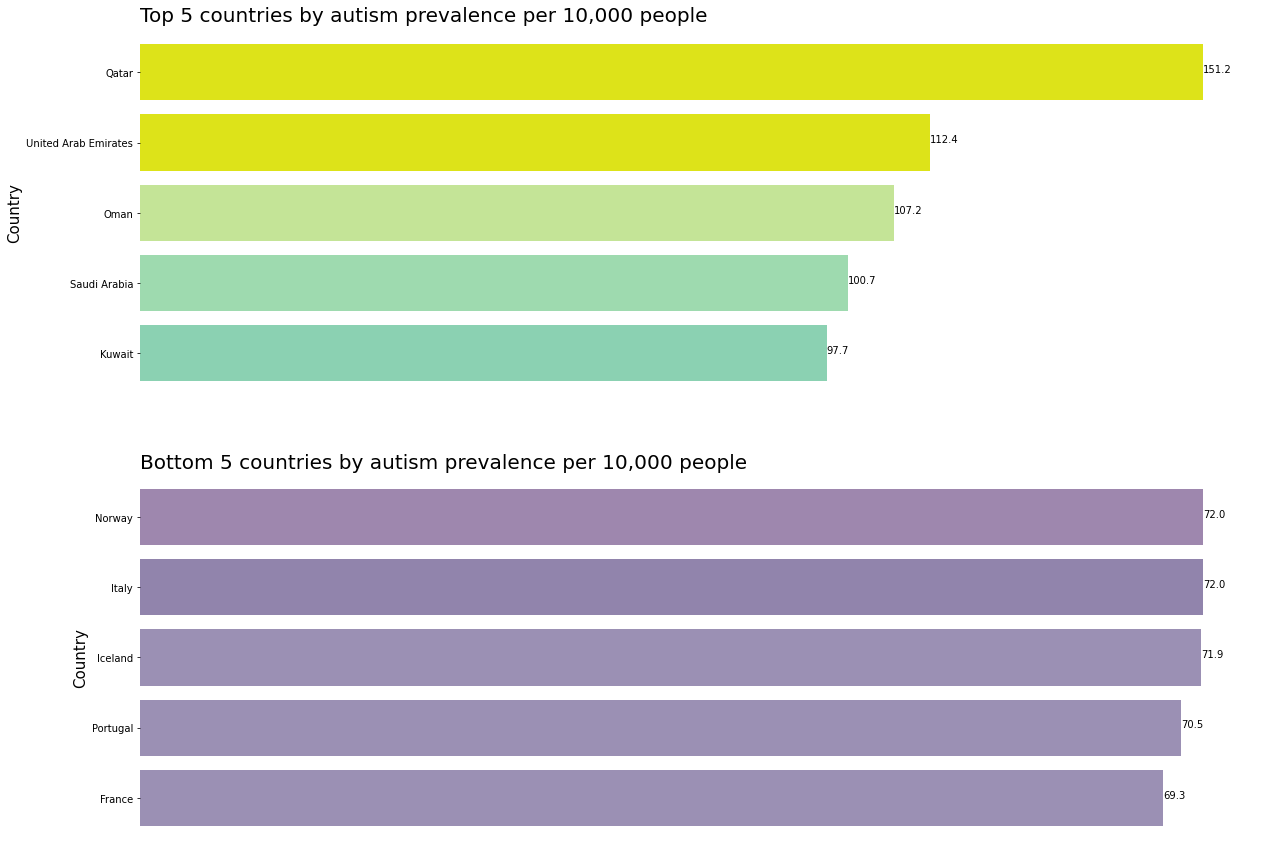

In [24]:
# Start a figure
ax1, ax2 = plt.subplots(2,1, figsize=(20,15))

# First subplot
ax1 = plt.gca()
ax1 = plt.subplot(2,1,1)
ax1.barh(merged['name'].iloc[0:5], merged['est_autism_prevalence_per_10k'].iloc[0:5],color=['#dde319','#dde319','#c4e497','#9edaaf','#8bd1b2']) # Specify the color of the bars

# Adding labels to the bars
for index, value in enumerate(merged['est_autism_prevalence_per_10k'].iloc[0:5]):
    plt.text(value, index,
             str(value))

# Formatting first ax
plt.title('Top 5 countries by autism prevalence per 10,000 people',size = 20, loc='left')
ax1.set_xticks([])
ax1.set_xticklabels([])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.invert_yaxis()
plt.ylabel('Country', size = 15)

# Second subplot
ax2 = plt.subplot(2,1,2) 
ax2.barh(merged['name'].iloc[170:], merged['est_autism_prevalence_per_10k'].iloc[170:],color=['#9e87ae','#9184ac','#9b90b4','#9b90b4','#9b90b4'])

# Adding labels to the bars
for index, value in enumerate(merged['est_autism_prevalence_per_10k'].iloc[170:]):
    plt.text(value, index,
             str(value))
    
# Formatting second ax
plt.title('Bottom 5 countries by autism prevalence per 10,000 people',size = 20, loc='left',pad=2)
plt.ylabel('Country', size = 15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.set_xticks([])
ax2.set_xticklabels([])
ax2.invert_yaxis()

fig.subplots_adjust(bottom=0.5)
plt.show()


## Plotting scatter graph

In [25]:
# First, standardize the GDP column so that outliers are taken into consideration
from sklearn.preprocessing import StandardScaler

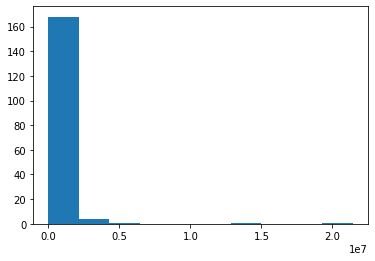

<Figure size 432x288 with 0 Axes>

In [37]:
# Check the distribution of GDP
plt.hist(merged.gdp_md_est)
plt.show()
plt.clf()

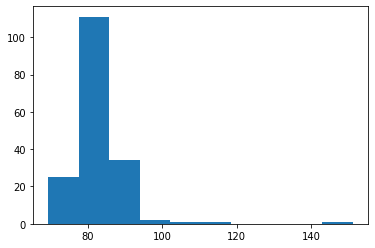

<Figure size 432x288 with 0 Axes>

In [38]:
# Check the distirbution of autism prevalence
plt.hist(merged.est_autism_prevalence_per_10k)
plt.show()
plt.clf()

In [39]:
# Scaling GDP
scaler = StandardScaler() # Instanciate StandarScaler

scaler.fit(merged[['gdp_md_est']]) # Fit scaler to data

merged['scaled_GDP'] = scaler.transform(merged[['gdp_md_est']]) # Use scaler to transform data

# Scaling Autism Prevalence
scaler.fit(merged[['est_autism_prevalence_per_10k']])
merged['scaled_autism_prev'] = scaler.transform(merged[['est_autism_prevalence_per_10k']])

# Check the new dataframe
merged.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,est_autism_prevalence_per_10k,scaled_GDP,scaled_autism_prev
prevalence_rank,,,,,,,,,
1.0,2832067.0,Asia,Qatar,QAT,175837,"POLYGON ((50.81011 24.75474, 50.74391 25.48242...",151.2,-0.159688,8.841897
2.0,9770529.0,Asia,United Arab Emirates,ARE,421142,"POLYGON ((51.57952 24.24550, 51.75744 24.29407...",112.4,-0.038513,3.790855
3.0,4974986.0,Asia,Oman,OMN,76331,"MULTIPOLYGON (((55.20834 22.70833, 55.23449 23...",107.2,-0.208841,3.113911
4.0,34268528.0,Asia,Saudi Arabia,SAU,792966,"POLYGON ((34.95604 29.35655, 36.06894 29.19749...",100.7,0.145158,2.267732
5.0,4207083.0,Asia,Kuwait,KWT,134628,"POLYGON ((47.97452 29.97582, 48.18319 29.53448...",97.7,-0.180044,1.877187


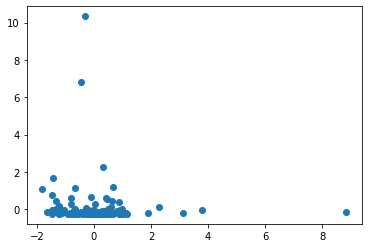

In [40]:
# Plot scatter plot
plt.scatter(merged.scaled_autism_prev, merged.scaled_GDP)